In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold ,cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

# Importing the Titanic Dataset:

In [118]:
df_titanic=pd.read_csv("titanic_train.csv")

In [119]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistical Information:
1.large difference between mean and std Values
2.large difference between the 75% and max values

This Shows dataset as outliers and skewness present

In [122]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 age and cabin column some null values are present 

In [123]:
df_titanic=df_titanic.drop(['Cabin','PassengerId','Ticket','Name'], axis=1)

Hence here dropping few columns which are not important

In [124]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


from here after survive is the output/label column and rest of it are features or input columns

Spliting the Numerical and Categorical data.

In [125]:
df_cat=df_titanic.select_dtypes(include=np.object)

In [126]:
df_num=df_titanic.select_dtypes(exclude=np.object0)

In [127]:
df_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [128]:
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [129]:
df_num['Age']=df_num['Age'].fillna(df_num['Age'].mode()[0])

here i have replaced the null values using repeated ages

In [130]:
df_num.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [131]:
df_cat.isnull().sum()

Sex         0
Embarked    2
dtype: int64

In [132]:
df_cat['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [133]:
df_cat['Embarked']=df_cat['Embarked'].replace({'S':0,'C':1,'Q':2})

Converted categorical to numerical data.

In [134]:
df_cat.isnull().sum()

Sex         0
Embarked    2
dtype: int64

2 null values present in Embarked column

In [135]:
df_cat['Embarked']=df_cat['Embarked'].fillna(df_cat['Embarked'].mode()[0])

filling null values using mode

In [136]:
df_cat.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [137]:
df_cat.describe()

,Embarked
count,891.000000
mean,0.361392
std,0.635673
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [138]:
df_num.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
df_num['Fare']=df_num['Fare'].replace(0,df_num['Fare'].mean())

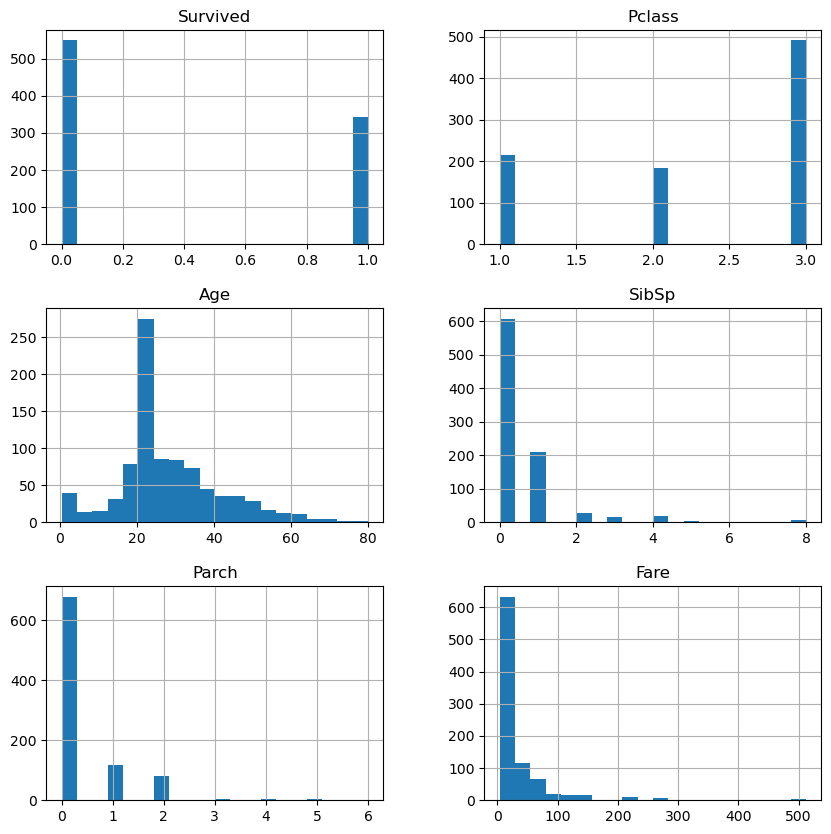

In [140]:
df_num.hist(bins = 20, figsize = (10,10))
plt.show()

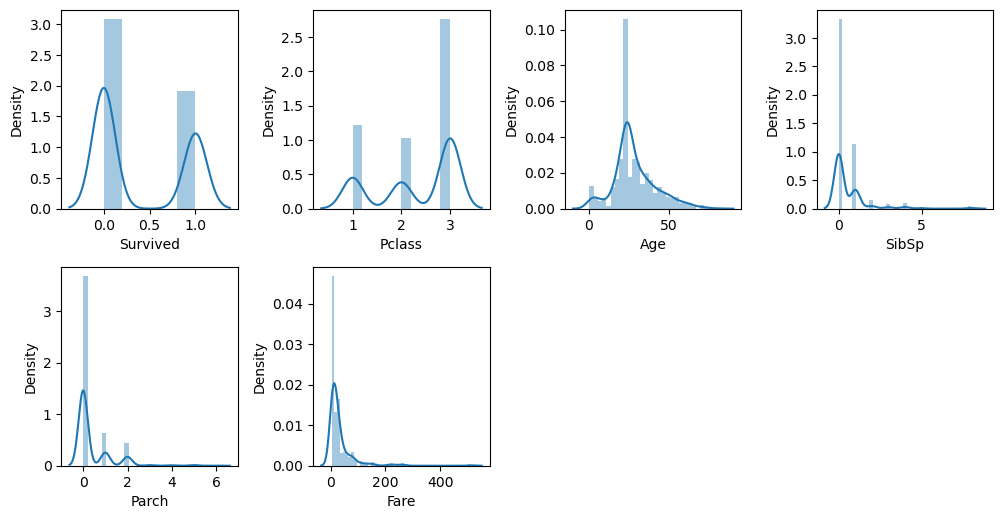

In [141]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_num:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

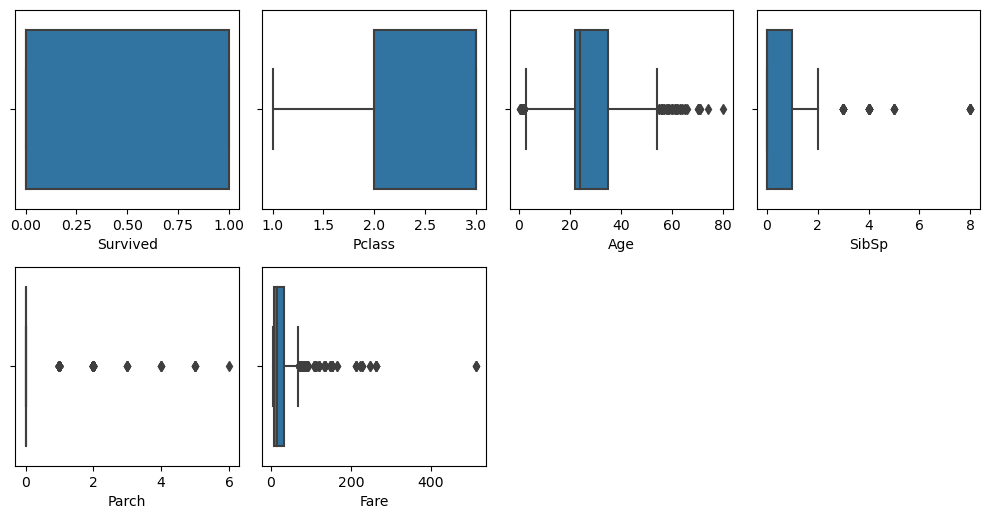

In [142]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_num:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.boxplot(df_num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [143]:
from scipy.stats import zscore

z=np.abs(zscore(df_num))
thershold = 3
df_new = df_num[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",df_num.shape)
print("shape after" .ljust(20),":",df_new.shape)
print("% loss" .ljust(20),":",((df_num.shape[0]-df_new.shape[0])/df_num.shape[0])*100)

shape before and after
shape before         : (891, 6)
shape after          : (820, 6)
% loss               : 7.968574635241302


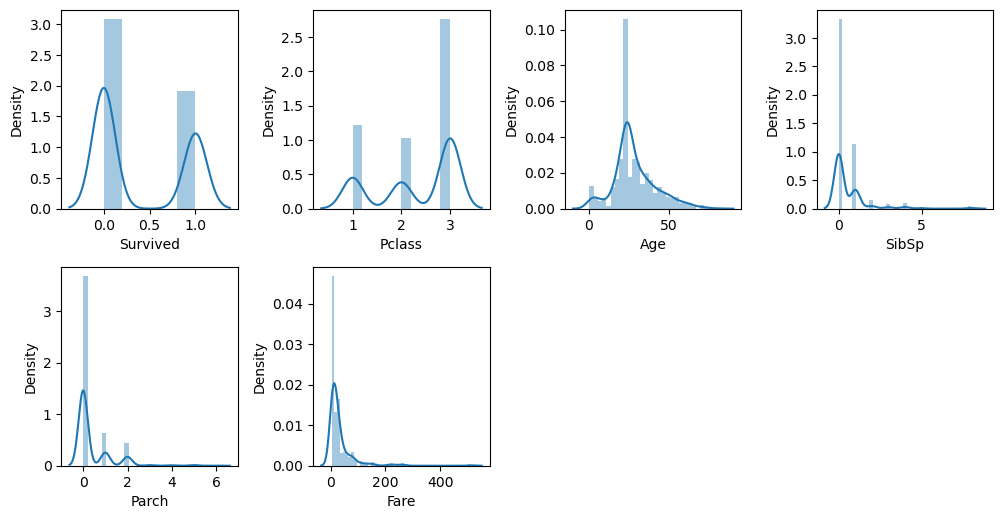

In [144]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [145]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Age         0.564753
SibSp       1.979577
Parch       2.122629
Fare        2.318368
dtype: float64

In [146]:
from sklearn.preprocessing import power_transform
df_new1 = power_transform(df_new, method = 'yeo-johnson')
df_new1 = pd.DataFrame(df_new1,columns=df_num.columns)

In [147]:
df_new1.skew()

Survived    0.450825
Pclass     -0.429718
Age         0.092760
SibSp       0.948944
Parch       1.581505
Fare        0.242198
dtype: float64

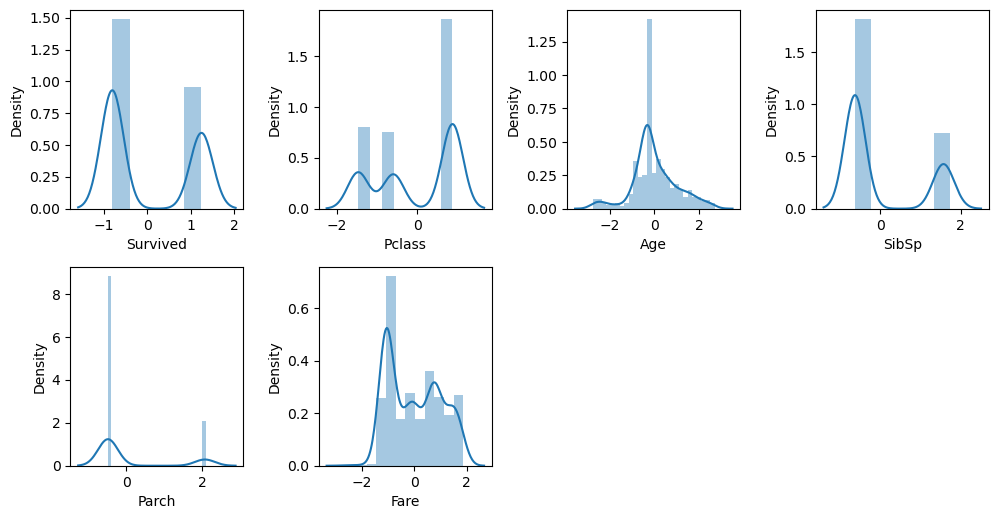

In [148]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_num:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(df_new1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [149]:
df_cat['Sex'].unique()

array(['male', 'female'], dtype=object)

In [150]:
df_cat['Sex']=df_cat['Sex'].map({'male':0,'female':1})

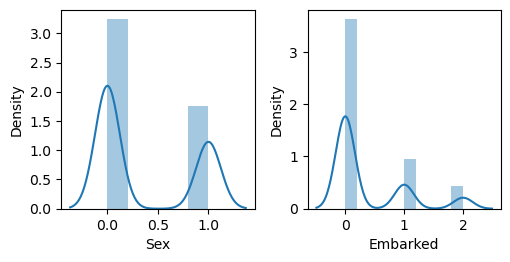

In [151]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_cat:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(df_cat[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

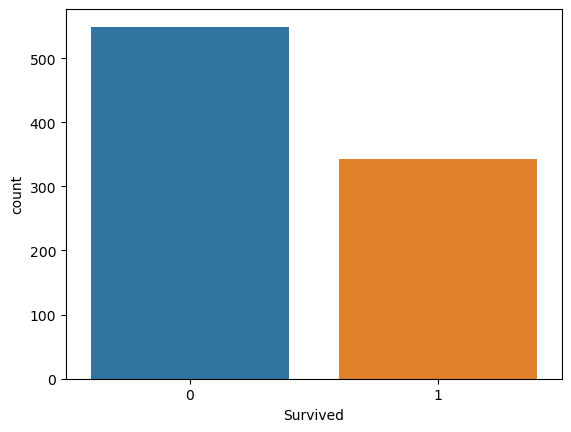

In [152]:
sns.countplot(df_num['Survived'])
plt.show()

In [153]:
df_num['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [154]:
y=df_num['Survived']

In [155]:
corr = df_cat.corr()
corr

,Sex,Embarked
Sex,1.000000,0.116569
Embarked,0.116569,1.000000


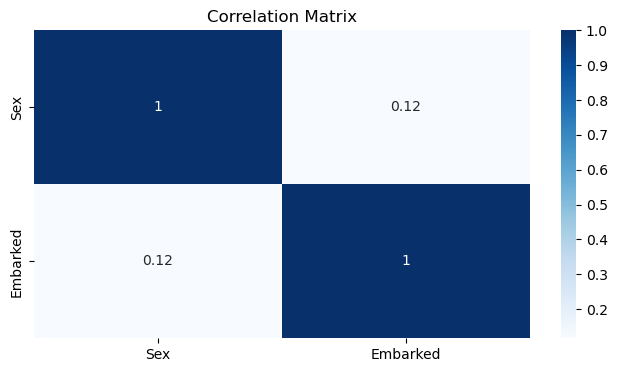

In [156]:
plt.figure(figsize= (8,4))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Correlation Matrix')
plt.show()

In [157]:
corr1=df_num.corr()
corr1

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.251092
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.556409
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.108469
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.155030
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.211818
Fare,0.251092,-0.556409,0.108469,0.155030,0.211818,1.000000


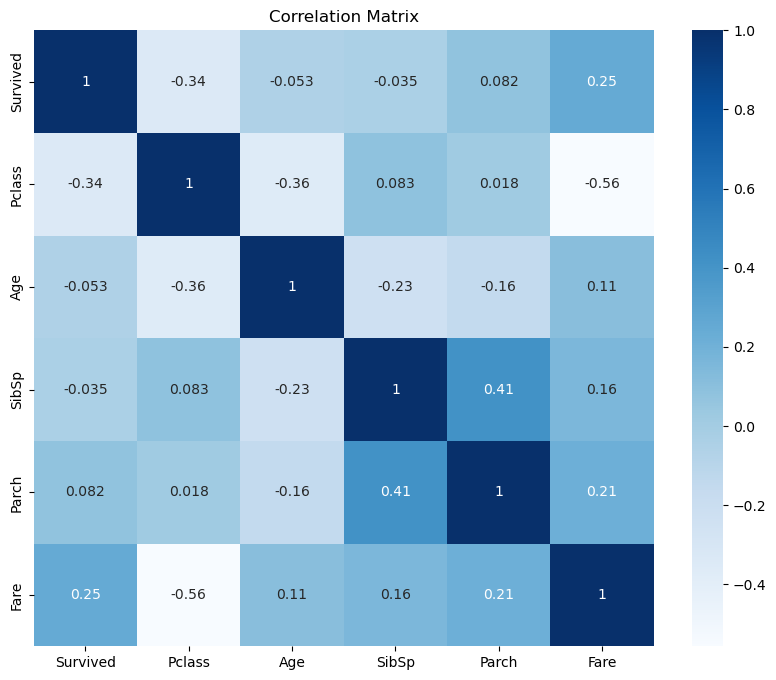

In [158]:
plt.figure(figsize= (10,8))
sns.heatmap(corr1, cmap = 'Blues', annot = True)
plt.title('Correlation Matrix')
plt.show()

In [159]:
df_set = pd.concat([df_num,df_cat], axis=1)
df_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,0,0.0
1,1,1,38.0,1,0,71.2833,1,1.0
2,1,3,26.0,0,0,7.9250,1,0.0
3,1,1,35.0,1,0,53.1000,1,0.0
4,0,3,35.0,0,0,8.0500,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0.0
887,1,1,19.0,0,0,30.0000,1,0.0
888,0,3,24.0,1,2,23.4500,1,0.0
889,1,1,26.0,0,0,30.0000,0,1.0


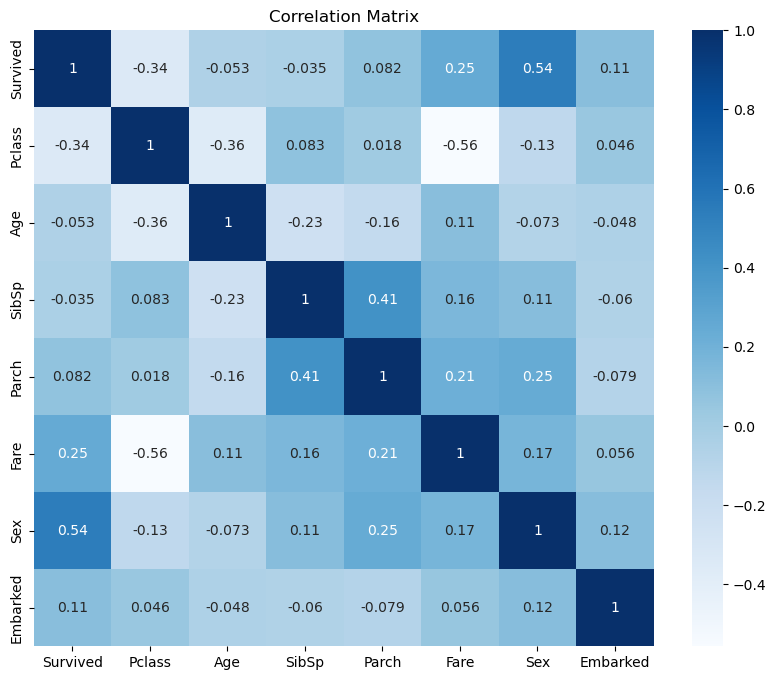

In [160]:
corr1= df_set.corr()

plt.figure(figsize= (10,8))
sns.heatmap(corr1, cmap = 'Blues', annot = True)
plt.title('Correlation Matrix')
plt.show()

In [161]:
x = df_set.drop(columns = ['Survived'])
y = df_set['Survived']

In [162]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [163]:
trainx.value_counts()

Pclass  Age        SibSp  Parch  Fare       Sex  Embarked
3       24.000000  0      0      7.895800   0    0.0         14
                                 8.050000   0    0.0         13
                                 7.750000   1    2.0         12
                                            0    2.0         10
                                 7.229200   0    1.0          7
                                                             ..
2       12.282633  0      1      19.683825  0    0.0          1
        13.000000  0      1      19.500000  1    0.0          1
        14.000000  1      0      30.070800  1    1.0          1
        16.000000  0      0      10.500000  0    0.0          1
3       74.000000  0      0      7.775000   0    0.0          1
Length: 958, dtype: int64

In [164]:
trainx['Sex'].value_counts()

0    687
1    411
Name: Sex, dtype: int64

In [165]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25, random_state = 315)

In [167]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))
scr_svm = cross_val_score(svm,x_sc,y,cv=5)
print("CV Score of SVM :", scr_svm.mean())
print("Difference between Accuracy Score & Cross Validation Score:",(accuracy_score(y_test,y_pred)-scr_svm.mean()))


Accuracy score 
 0.8475336322869955
Confusion Matrix 
 [[136  14]
 [ 20  53]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       150
           1       0.79      0.73      0.76        73

    accuracy                           0.85       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.85      0.85      0.85       223

ROC AUC Score 
 0.8163470319634702
CV Score of SVM : 0.8327663046889713
Difference between Accuracy Score & Cross Validation Score: 0.014767327598024238


In [169]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))
scr_dt = cross_val_score(dt,x_sc,y,cv=5)
print("CV Score of DT :", scr_dt.mean())
print("Difference between Accuracy Score & Cross Validation Score:",(accuracy_score(y_test,y_pred)-scr_dt.mean()))



Accuracy score 
 0.7847533632286996
Confusion Matrix 
 [[116  34]
 [ 14  59]]
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       150
           1       0.63      0.81      0.71        73

    accuracy                           0.78       223
   macro avg       0.76      0.79      0.77       223
weighted avg       0.81      0.78      0.79       223

ROC AUC Score 
 0.7907762557077627
CV Score of DT : 0.7811687904086373
Difference between Accuracy Score & Cross Validation Score: 0.003584572820062304


In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))
scr_rfc = cross_val_score(rfc,x_sc,y,cv=5)
print("CV Score of RFC :", scr_rfc.mean())
print("Difference between Accuracy Score & Cross Validation Score:",(accuracy_score(y_test,y_pred)-scr_rfc.mean()))


Accuracy score 
 0.8385650224215246
Confusion Matrix 
 [[128  22]
 [ 14  59]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       150
           1       0.73      0.81      0.77        73

    accuracy                           0.84       223
   macro avg       0.81      0.83      0.82       223
weighted avg       0.84      0.84      0.84       223

ROC AUC Score 
 0.8307762557077626
CV Score of RFC : 0.8103508882053857
Difference between Accuracy Score & Cross Validation Score: 0.028214134216138942


In [172]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))
scr_dt = cross_val_score(dt,x_sc,y,cv=5)
print("CV Score of DT :", scr_dt.mean())
scr_abc = cross_val_score(abc,x_sc,y,cv=5)
print("CV Score of ABC :", scr_abc.mean())
print("Difference between Accuracy Score & Cross Validation Score:",(accuracy_score(y_test,y_pred)-scr_abc.mean()))


Accuracy score 
 0.8071748878923767
Confusion Matrix 
 [[126  24]
 [ 19  54]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       150
           1       0.69      0.74      0.72        73

    accuracy                           0.81       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.81      0.81      0.81       223

ROC AUC Score 
 0.78986301369863
CV Score of DT : 0.7878978093026175
CV Score of ABC : 0.8014123407193521
Difference between Accuracy Score & Cross Validation Score: 0.005762547173024601


In [173]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))
scr_lr = cross_val_score(lr,x_sc,y,cv=5)
print("CV Score of DT :", scr_lr.mean())
print("Difference between Accuracy Score & Cross Validation Score:",(accuracy_score(y_test,y_pred)-scr_lr.mean()))


Accuracy score 
 0.7847533632286996
Confusion Matrix 
 [[121  29]
 [ 19  54]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       150
           1       0.65      0.74      0.69        73

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.78      0.79       223

ROC AUC Score 
 0.7731963470319634
CV Score of DT : 0.7923670830456343
Difference between Accuracy Score & Cross Validation Score: -0.007613719816934705


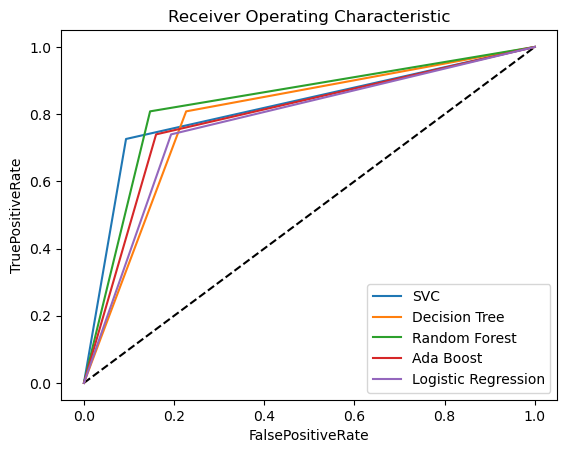

In [174]:
y_pred_prob1 = svm.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = rfc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = abc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = lr.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1 ,label='SVC')
plt.plot(fpr2, tpr2 ,label='Decision Tree')
plt.plot(fpr3, tpr3 ,label='Random Forest')
plt.plot(fpr4, tpr4 ,label='Ada Boost')
plt.plot(fpr5, tpr5 ,label='Logistic Regression')
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

In [175]:
param = {'base_estimator' : [None],
        'n_estimators': [50,55,60,65,70,75,80,85,90,95,100],
        'learning_rate':[1.0],
        'random_state' : [None],
        'algorithm': ['SAMME.R'],
        }

In [176]:
grid_search=GridSearchCV(abc,param_grid = param, cv=5)

In [177]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'base_estimator': [None],
                         'learning_rate': [1.0],
                         'n_estimators': [50, 55, 60, 65, 70, 75, 80, 85, 90,
                                          95, 100],
                         'random_state': [None]})

In [178]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 70,
 'random_state': None}

In [179]:
final = AdaBoostClassifier(algorithm = 'SAMME.R', base_estimator = None, learning_rate = 1.0,
                          n_estimators = 75 , random_state = None,)
final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Accuracy- Score:-", accuracy_score(y_test,pred))
print("Classification Report:DT-" , classification_report(y_test,pred))

Accuracy- Score:- 0.8251121076233184
Classification Report:DT-               precision    recall  f1-score   support

           0       0.88      0.85      0.87       150
           1       0.72      0.77      0.74        73

    accuracy                           0.83       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.83      0.83      0.83       223



In [180]:
import joblib
joblib.dump(final, "titanic-prediction.pk1")

['titanic-prediction.pk1']